# Data cleaning



---

First of all, we will start by cleaning and studying this dataset.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive



drive.mount('/gdrive')

%cd /gdrive/My Drive/AN2DL_Homework_1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/AN2DL_Homework_1


## ⚙️ Import Libraries

In [ ]:
import numpy as np



import tensorflow as tf

from tensorflow import keras as tfk

from tensorflow.keras import layers as tfkl

import pandas as pd



from matplotlib import pyplot as plt



np.random.seed(42)

tf.random.set_seed(42);

## ⏳ Load the Data

In [ ]:
import os

print(os.getcwd())

data = np.load('data/training_set.npz')



X = data['images']

y = data['labels']



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/gdrive/My Drive/AN2DL_Homework_1


## What did we just load ?

In [ ]:
# On data size

print("Shape of the X data : " + str(X.shape))

print("Shape of the y data : " + str(y.shape))

print("Shape of one of the images : " + str(X[0].shape))

print("Shape of one of the labels : " + str(y[0].shape) + "\n")



# What do the labels look like

unique_labels = np.unique(y)

n_classes = len(unique_labels)

print("The labels take their value from one of the {} following labels : {}".format(n_classes, unique_labels) + "\n")



# Define a mapping of labels to their corresponding digit names

labels = {0: 'Basophil',

          1: 'Eosinophil',

          2: 'Erythroblast',

          3: 'Immature granulocytes',

          4: 'Lymphocyte',

          5: 'Monocyte',

          6: 'Neutrophil',

          7: 'Platelet'}



print("Each of these labels corresponds to a blood cell type. Here is the correspondance between every label and its real-life meaning :")

print("\n".join("{} : {}".format(k, v) for k, v in labels.items()))

Shape of the X data : (13759, 96, 96, 3)
Shape of the y data : (13759, 1)
Shape of one of the images : (96, 96, 3)
Shape of one of the labels : (1,)

The labels take their value from one of the 8 following labels : [0 1 2 3 4 5 6 7]

Each of these labels corresponds to a blood cell type. Here is the correspondance between every label and its real-life meaning :
0 : Basophil
1 : Eosinophil
2 : Erythroblast
3 : Immature granulocytes
4 : Lymphocyte
5 : Monocyte
6 : Neutrophil
7 : Platelet


## Data cleaning



While training and evaluating the model, some flaws appear in the data. The following code sections aim to evaluate the amount of problems in the data, and to correct it.

In [ ]:
unique_images, nbr_occurences = np.unique(X,axis=0, return_counts=1)

print("In total, {} unique images were found, for a total of {} images.".format(len(unique_images), X.shape[0]))

In total, 11953 unique images were found, for a total of 13759 images.


There are 10 images with duplicates in the dataset.
Here is the count for each of these : 
 - Image with duplicates 0 : 1600 times in dataset, with labels [0 1 2 3 4 5 6 7]


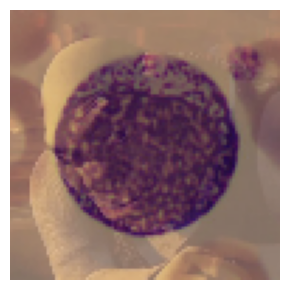

 - Image with duplicates 1 : 2 times in dataset, with labels [1]


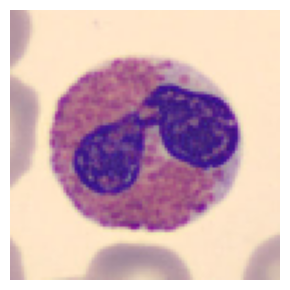

 - Image with duplicates 2 : 2 times in dataset, with labels [1]


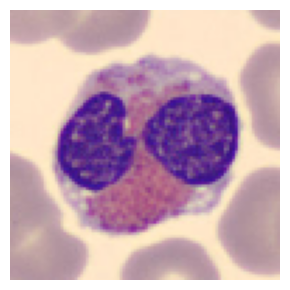

 - Image with duplicates 3 : 200 times in dataset, with labels [5]


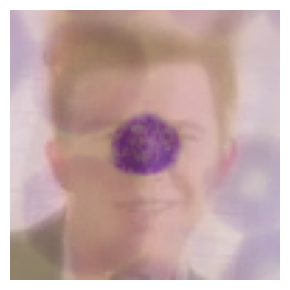

 - Image with duplicates 4 : 2 times in dataset, with labels [3]


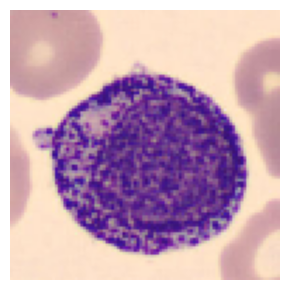

 - Image with duplicates 5 : 2 times in dataset, with labels [5]


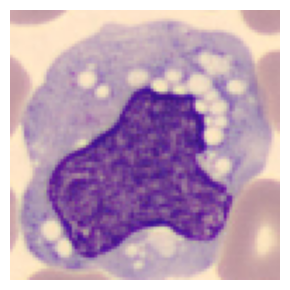

 - Image with duplicates 6 : 2 times in dataset, with labels [0]


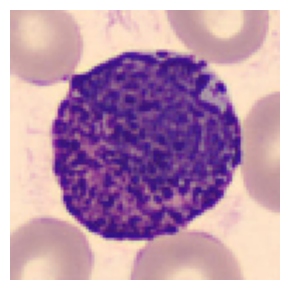

 - Image with duplicates 7 : 2 times in dataset, with labels [3]


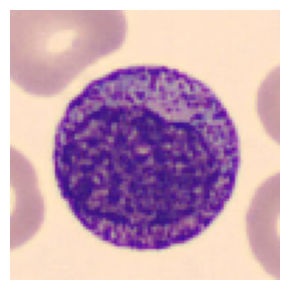

 - Image with duplicates 8 : 2 times in dataset, with labels [3]


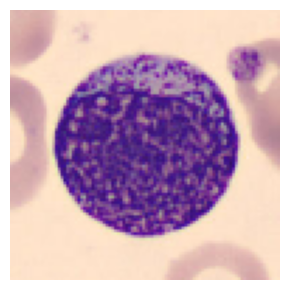

 - Image with duplicates 9 : 2 times in dataset, with labels [0]


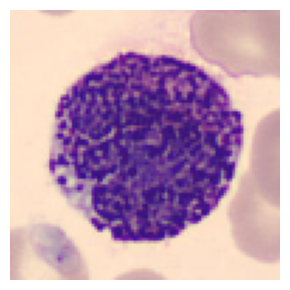

In [ ]:
# Finding all images with count > 1 (more than once in the dataset)

unique_images_with_duplicates = np.where(nbr_occurences > 1)

number_of_images_with_duplicates = len(unique_images_with_duplicates[0])

duplicates_indexes = []

duplicates_labels = []

print("There are {} images with duplicates in the dataset.".format(number_of_images_with_duplicates))

print("Here is the count for each of these : ")



# Display counts of duplicates per one of these images

for i in range(number_of_images_with_duplicates):

    image_occurences = nbr_occurences[unique_images_with_duplicates[0][i]]



    # Get the i-th image with duplicates

    image = unique_images[unique_images_with_duplicates[0][i]]



    # Get the indexes of all its duplicates in X

    matching_indexes = np.where(np.all(X == image, axis=(1, 2, 3)))[0]

    duplicates_indexes.append(matching_indexes)



    # Get all the unique labels associated with it

    matching_labels = np.unique(y[matching_indexes])

    duplicates_labels.append(y[matching_indexes])



    print(" - Image with duplicates {} : {} times in dataset, with labels {}".format(

        i, image_occurences, matching_labels))





    # Display image with duplicates

    fig, ax = plt.subplots(1, 1, figsize=(5, 3))

    ax.imshow(np.clip(image, 0, 255))

    ax.axis('off')

    plt.tight_layout()

    plt.show()




Okay, so we have 8 images present twice in the duplicates ; for each of these pairs, the labels is the same in a same pair.



We have one obvious Rickroll, present 200 times for class 5, that we'll have to remove.



Now, let's look at that last (very suspicious) image (image 0), which is associated at least once with every label :

In [ ]:
print(len(duplicates_labels[0]))

labels, nbr_of_times = np.unique(duplicates_labels[0], axis=0, return_counts=1)

print("Here are the counts of each label for image 0 :")

for i in range(len(labels)):

    print(" - Label {} : {} times".format(labels[i], nbr_of_times[i]))

1600
Here are the counts of each label for image 0 :
 - Label [0] : 200 times
 - Label [1] : 200 times
 - Label [2] : 200 times
 - Label [3] : 200 times
 - Label [4] : 200 times
 - Label [5] : 200 times
 - Label [6] : 200 times
 - Label [7] : 200 times


## Cleaning the data

In [ ]:
# Getting rid of all the 1600 identical images, and of one image from all of the other pairs of duplicates



duplicate_of_1 = duplicates_indexes[1][1]

duplicate_of_2 = duplicates_indexes[2][1]

duplicate_of_4 = duplicates_indexes[4][1]

duplicate_of_5 = duplicates_indexes[5][1]

duplicate_of_6 = duplicates_indexes[6][1]

duplicate_of_7 = duplicates_indexes[7][1]

duplicate_of_8 = duplicates_indexes[8][1]

duplicate_of_9 = duplicates_indexes[9][1]



single_duplicates = [duplicate_of_1,

                     duplicate_of_2,

                     duplicate_of_4,

                     duplicate_of_5,

                     duplicate_of_6,

                     duplicate_of_7,

                     duplicate_of_8,

                     duplicate_of_9,]



Indexes_to_get_rid_of = np.concatenate(

    [

        duplicates_indexes[0],        # Images with Shrek

        duplicates_indexes[3],        # Rickroll

        single_duplicates])



# getting rid of the duplicate images

images = np.delete(X, Indexes_to_get_rid_of, axis=0)

labels = np.delete(y, Indexes_to_get_rid_of, axis=0)



# Save both arrays in new .npz file

np.savez_compressed("data/training_set_CLEANED_V2.npz", images=images, labels=labels)

## 🔬 What do these cells actually look like ?

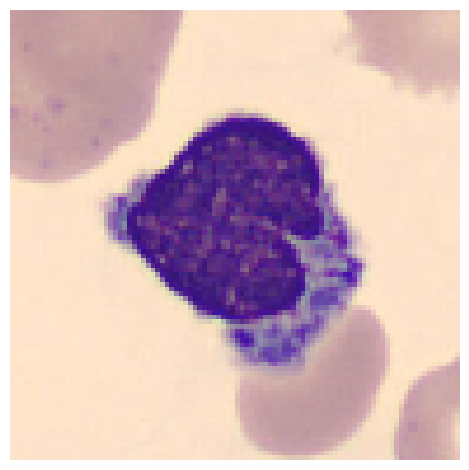

In [ ]:
Image_index = 11958

fig, ax = plt.subplots()

ax.imshow(np.clip(X[Image_index], 0, 255))  # Display clipped item images

ax.axis('off')

plt.tight_layout()

plt.show()

In [ ]:
np.array_equal(X_test[48], X_test[66])

identical_images = []

for i in range(len(X)):

    if np.array_equal(X[i], X_test[48]):

      identical_images.append(i)

print(identical_images)



print(np.unique(y[identical_images]))

len(identical_images)


[11959, 11960, 11961, 11962, 11963, 11964, 11965, 11966, 11967, 11968, 11969, 11970, 11971, 11972, 11973, 11974, 11975, 11976, 11977, 11978, 11979, 11980, 11981, 11982, 11983, 11984, 11985, 11986, 11987, 11988, 11989, 11990, 11991, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999, 12000, 12001, 12002, 12003, 12004, 12005, 12006, 12007, 12008, 12009, 12010, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12023, 12024, 12025, 12026, 12027, 12028, 12029, 12030, 12031, 12032, 12033, 12034, 12035, 12036, 12037, 12038, 12039, 12040, 12041, 12042, 12043, 12044, 12045, 12046, 12047, 12048, 12049, 12050, 12051, 12052, 12053, 12054, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12062, 12063, 12064, 12065, 12066, 12067, 12068, 12069, 12070, 12071, 12072, 12073, 12074, 12075, 12076, 12077, 12078, 12079, 12080, 12081, 12082, 12083, 12084, 12085, 12086, 12087, 12088, 12089, 12090, 12091, 12092, 12093, 12094, 12095, 12096, 12097, 12098, 12099, 12100, 12101

1600

In [ ]:
N_images_per_class = 10



for class_k in range(n_classes):

    print("Examples of the class {} : {}".format(class_k, labels[class_k]))

    indexes_of_class_k = np.where(y == class_k)[0]

    fig, axes = plt.subplots(1, N_images_per_class, figsize=(14, 10))

    for i in range(N_images_per_class):

        ax = axes[i]

        ax.imshow(np.clip(X[indexes_of_class_k[i]], 0, 255))  # Display clipped item images

        ax.axis('off')

    plt.tight_layout()

    plt.show()

    print()

Output hidden; open in https://colab.research.google.com to view.

## 🖥 What are some basic statistics on the different classes ?

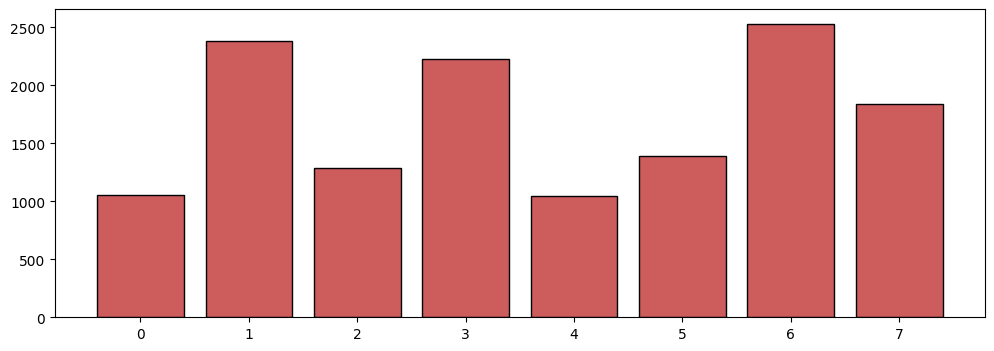

In [ ]:
# Plot histogram of each classes represented in the cells

fig, ax = plt.subplots(figsize=(12, 4))

bins = np.arange(start=-0.5, stop=8.5, step=1)

ax.hist(y, bins=bins, edgecolor='k', color='indianred', rwidth=0.8)

ax.set_xticks(np.arange(8))

plt.show()

## 🖌 What are the most important colors in each of these images ?

RGB color histograms for the class 0 : [7]


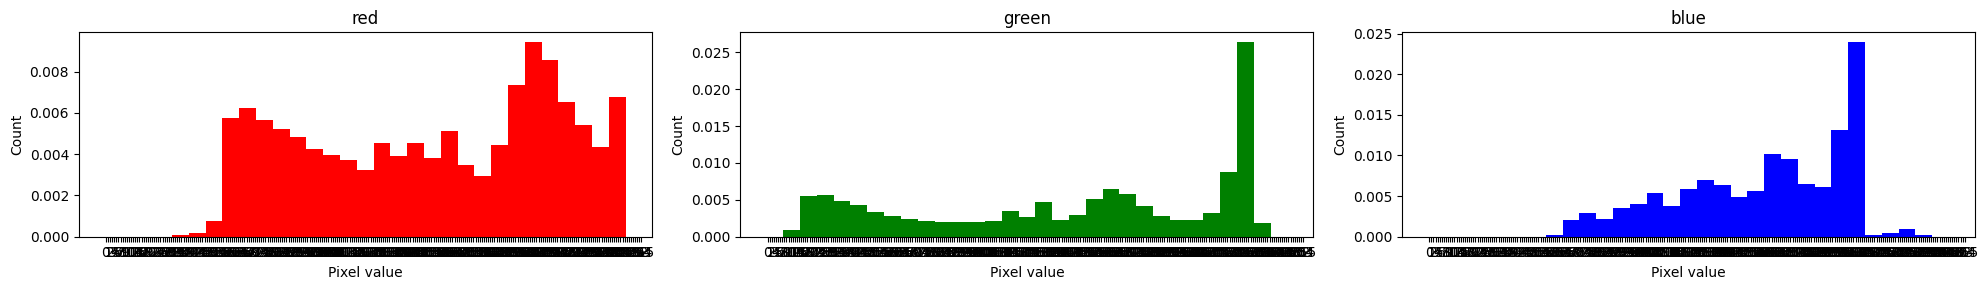


RGB color histograms for the class 1 : [3]


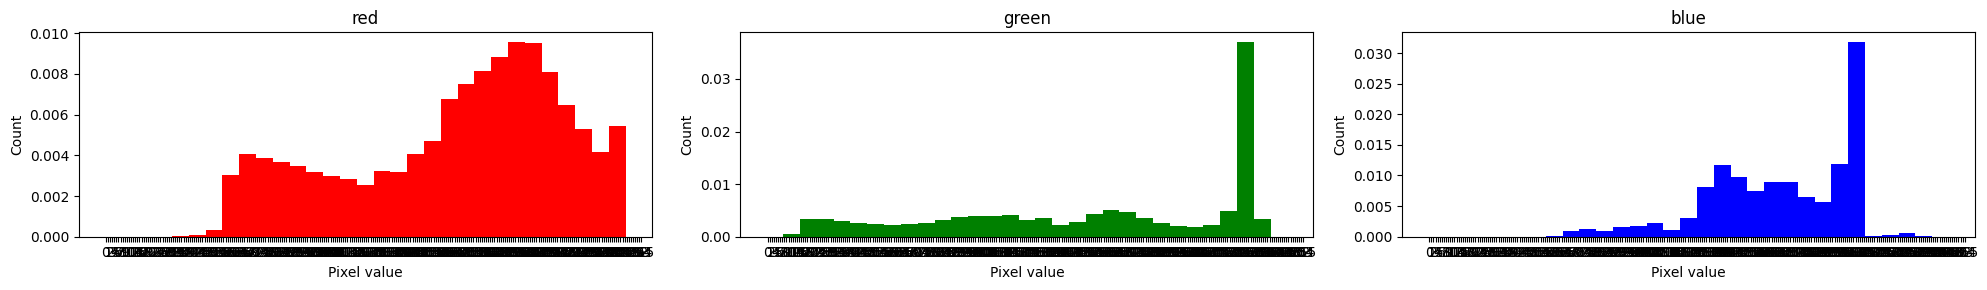


RGB color histograms for the class 2 : [6]


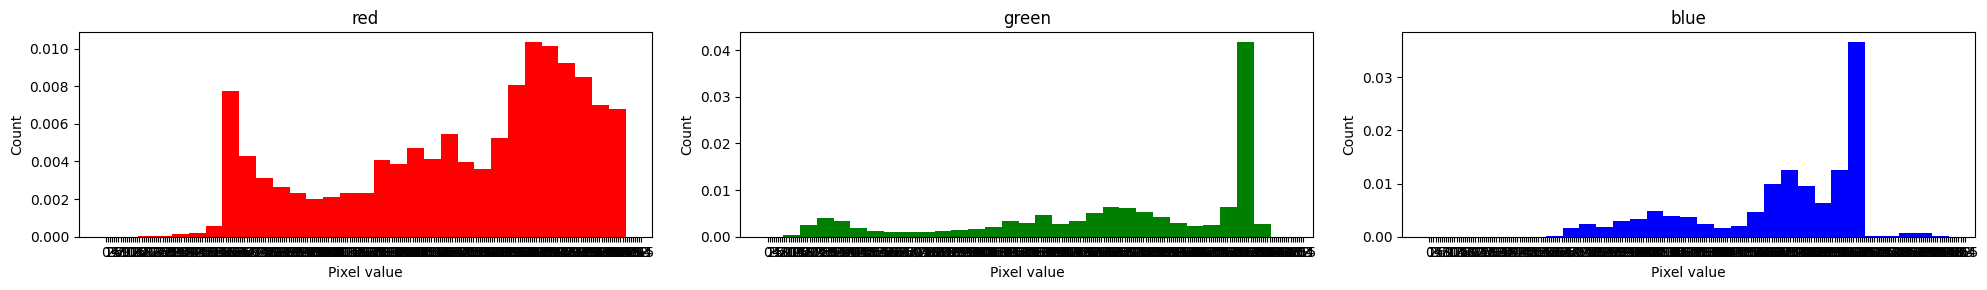


RGB color histograms for the class 3 : [6]


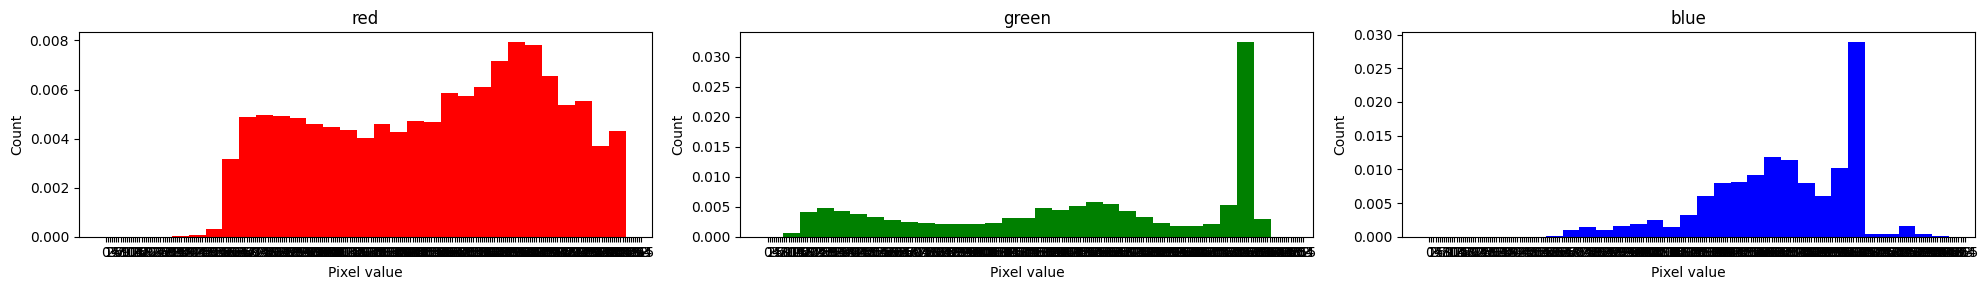


RGB color histograms for the class 4 : [7]


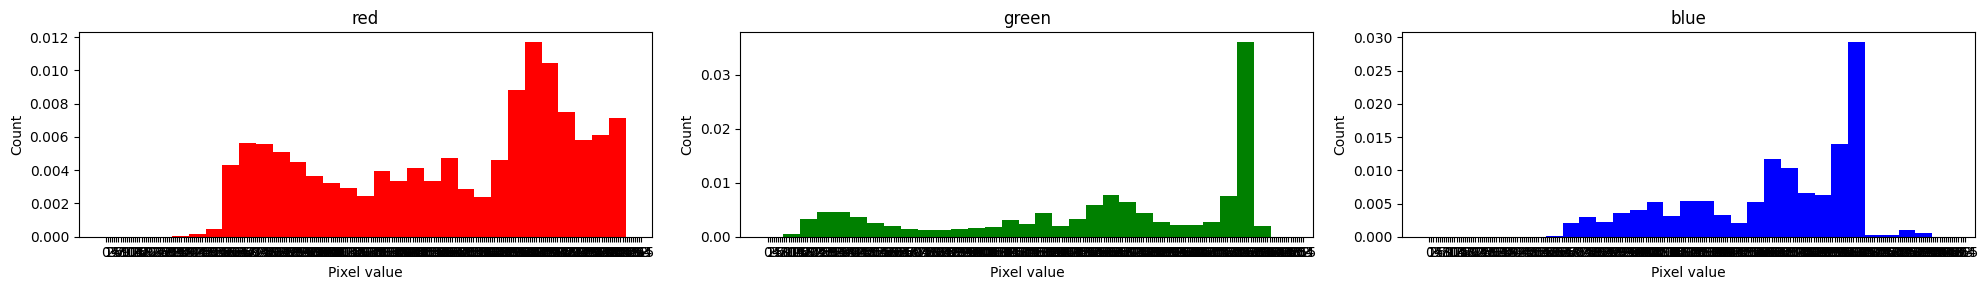


RGB color histograms for the class 5 : [6]


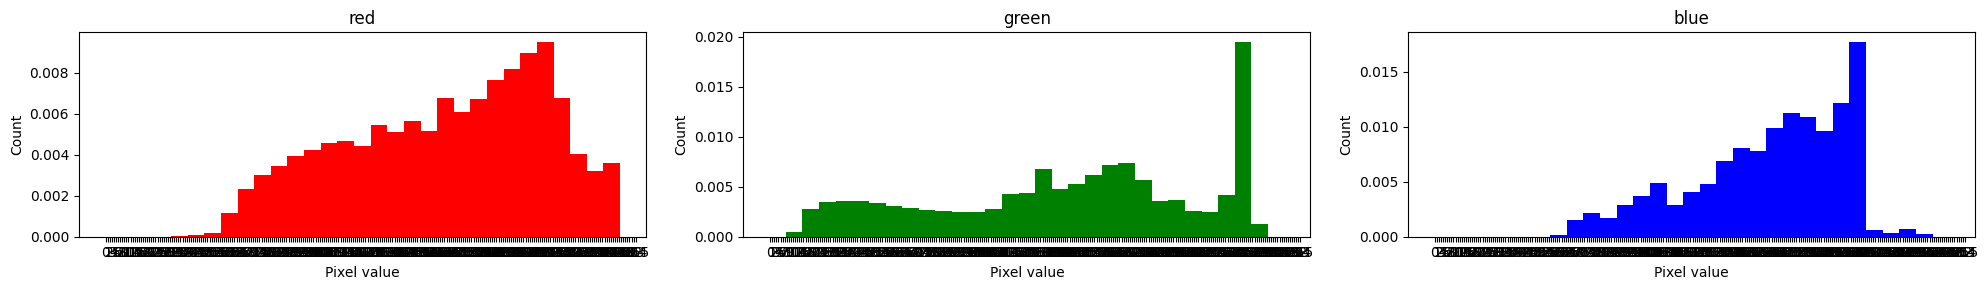


RGB color histograms for the class 6 : [2]


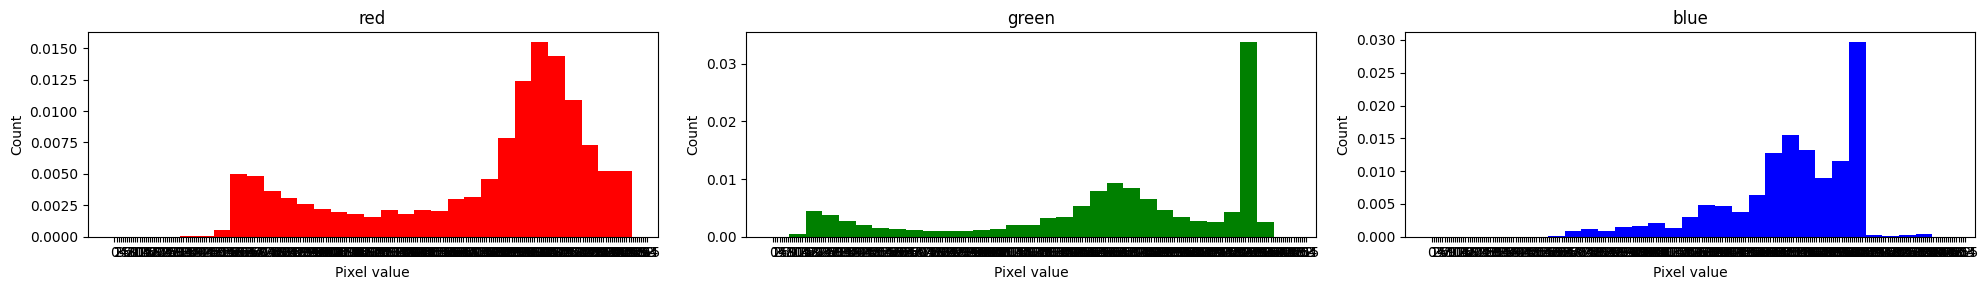


RGB color histograms for the class 7 : [2]


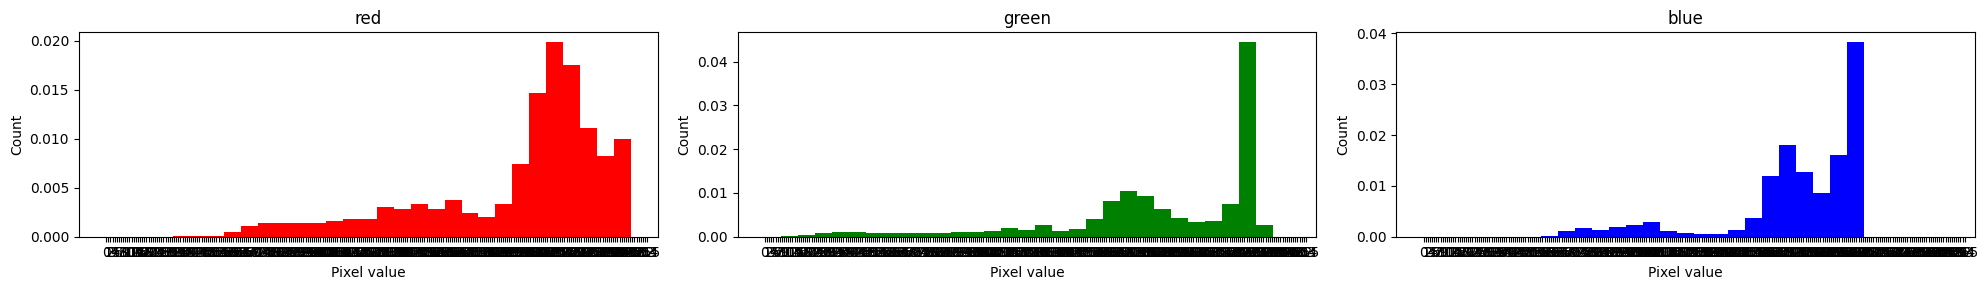

In [ ]:
colors = ['red', 'green', 'blue']



for class_k in range(n_classes):

    print("RGB color histograms for the class {} : {}".format(class_k, labels[class_k]))

    indexes_of_class_k = np.where(y == class_k)[0]

    fig, axes = plt.subplots(1, 3, figsize=(20, 3))



    for i in range(3):

        ax = axes[i]

        bins = np.arange(start=-0.5, stop=255.5, step=8)

        pixel_values = X[indexes_of_class_k,:,:,i].flatten()

        ax.hist(pixel_values, bins=bins, color=colors[i], density = True)

        ax.set_xticks(np.arange(256))

        ax.set_title(colors[i])

        ax.set_xlabel("Pixel value")

        ax.set_ylabel("Count")

    plt.tight_layout()

    plt.show()

    print()